In [1]:
import os
import json

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
log_dir = ".crag_eva_data"

In [3]:
results = []

In [4]:
for eval_file in os.listdir(log_dir):
    print(eval_file)
    method = eval_file.split(".json")[0].split("_")[-1]
    # if "lm31" in eval_file and "lm31_j30" not in method:
    if "lm31" in eval_file and "lm31_j30" not in eval_file:
        print(f"skipping {eval_file}")
        continue
    model = "llama_3.1" if "lm31" in eval_file else "llama_3.0"
    print(method)
    print(model)
    with open(os.path.join(log_dir, eval_file)) as f:
        contents = json.load(f)
        print(contents['evaluation_results'])
        results.append(dict(**contents['evaluation_results'], model=model, method=method))
    # break

evaluation_full_2025-04-06_12-21-40_lm31_j30_kg.json
kg
llama_3.1
{'score': 0.05691056910569103, 'accuracy': 0.24611973392461198, 'hallucination': 0.18920916481892092, 'missing': 0.5646711012564671, 'n_miss': 1528, 'n_correct': 666, 'n_hallucination': 512, 'total': 2706}
evaluation_full_2025-03-27_11-07-29_kg.json
kg
llama_3.0
{'score': 0.0003695491500370629, 'accuracy': 0.26348854397634885, 'hallucination': 0.2631189948263119, 'missing': 0.47339246119733924, 'n_miss': 1281, 'n_correct': 713, 'n_hallucination': 712, 'total': 2706}
evaluation_full_2025-03-29_19-45-30_lm31_kg.json
skipping evaluation_full_2025-03-29_19-45-30_lm31_kg.json
evaluation_full_2025-03-27_15-50-13_rag.json
rag
llama_3.0
{'score': -0.0177383592017738, 'accuracy': 0.2557280118255728, 'hallucination': 0.2734663710273466, 'missing': 0.4708056171470806, 'n_miss': 1274, 'n_correct': 692, 'n_hallucination': 740, 'total': 2706}
evaluation_full_2025-03-29_19-15-11_lm31_rag.json
skipping evaluation_full_2025-03-29_19-15-1

In [5]:
results

[{'score': 0.05691056910569103,
  'accuracy': 0.24611973392461198,
  'hallucination': 0.18920916481892092,
  'missing': 0.5646711012564671,
  'n_miss': 1528,
  'n_correct': 666,
  'n_hallucination': 512,
  'total': 2706,
  'model': 'llama_3.1',
  'method': 'kg'},
 {'score': 0.0003695491500370629,
  'accuracy': 0.26348854397634885,
  'hallucination': 0.2631189948263119,
  'missing': 0.47339246119733924,
  'n_miss': 1281,
  'n_correct': 713,
  'n_hallucination': 712,
  'total': 2706,
  'model': 'llama_3.0',
  'method': 'kg'},
 {'score': -0.0177383592017738,
  'accuracy': 0.2557280118255728,
  'hallucination': 0.2734663710273466,
  'missing': 0.4708056171470806,
  'n_miss': 1274,
  'n_correct': 692,
  'n_hallucination': 740,
  'total': 2706,
  'model': 'llama_3.0',
  'method': 'rag'},
 {'score': 0.03843311160384322,
  'accuracy': 0.24390243902439024,
  'hallucination': 0.20546932742054694,
  'missing': 0.5506282335550629,
  'n_miss': 1490,
  'n_correct': 660,
  'n_hallucination': 556,
  '

In [6]:
df = pd.DataFrame.from_records(results)

In [7]:
df

,score,accuracy,hallucination,missing,n_miss,n_correct,n_hallucination,total,model,method
0,0.056911,0.246120,0.189209,0.564671,1528,666,512,2706,llama_3.1,kg
1,0.000370,0.263489,0.263119,0.473392,1281,713,712,2706,llama_3.0,kg
2,-0.017738,0.255728,0.273466,0.470806,1274,692,740,2706,llama_3.0,rag
3,0.038433,0.243902,0.205469,0.550628,1490,660,556,2706,llama_3.1,rag
4,0.042868,0.178123,0.135255,0.686622,1858,482,366,2706,llama_3.1,zeroshot
5,-0.146341,0.283075,0.429416,0.287509,778,766,1162,2706,llama_3.0,zeroshot


In [15]:
method_name_map = {
    'zeroshot': 'No Retrieval',
    'rag': 'Vector Retrieval',
    'kg': 'Knowledge Graph',
}

In [20]:
model_name_map = {
    'llama_3.0': 'Llama 3.0',
    'llama_3.1': 'Llama 3.1',
}

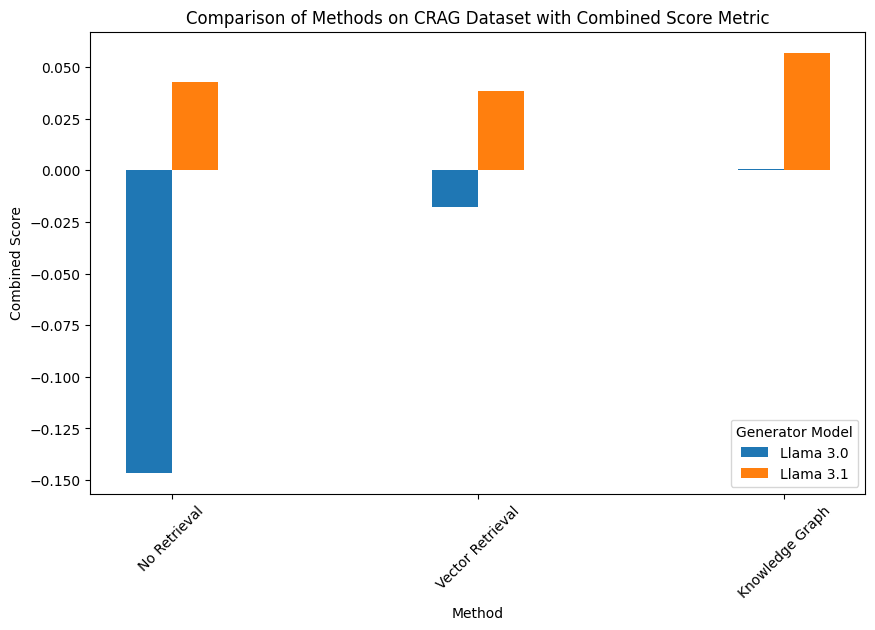

In [33]:
# df
# metric_name = "llm_judge_matcher_accuracy"
# metric_name = "accuracy"
# metric_pretty = "Accuracy"
# metric_name = "missing"
# metric_pretty = "Missing ratio"
# metric_name = "hallucination"
# metric_pretty = "Hallucination ratio"
metric_name = "score"
metric_pretty = "Combined Score"
# for dataset in results:


methods = df["method"].unique()
methods = sorted(methods, reverse=True)
models = df["model"].unique()
models = sorted(models)
models = models

x = np.arange(len(methods))  # Position of each method on the x-axis
width = 0.15  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each model within each method group
for i, model in enumerate(models):
    model_df = df[df["model"] == model]
    f1_scores = [model_df[model_df["method"] == method][metric_name].values[0] if method in model_df["method"].values else 0 for method in methods]
    model_pretty = model_name_map.get(model, model)
    ax.bar(x + i * width, f1_scores, width, label=model_pretty)

# Formatting
ax.set_xlabel("Method")
ax.set_ylabel(f"{metric_pretty}")
ax.set_title(f"Comparison of Methods on CRAG Dataset with {metric_pretty} Metric")
ax.set_xticks(x + width * (len(models) / 2 - 0.5))
pretty_methods = [method_name_map.get(method, method) for method in methods]
ax.set_xticklabels(pretty_methods, rotation=45)  # Rotate labels for better readability
ax.legend(title="Generator Model", loc='lower right')

plt.savefig(f"~/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/crag_eva_{metric_name}.pdf", bbox_inches='tight')
plt.show()


    # TODO separate chunking methods use index_path / corpus_path